#### Objective: Explore FPL data to identify key insights for fantasy league predictions.

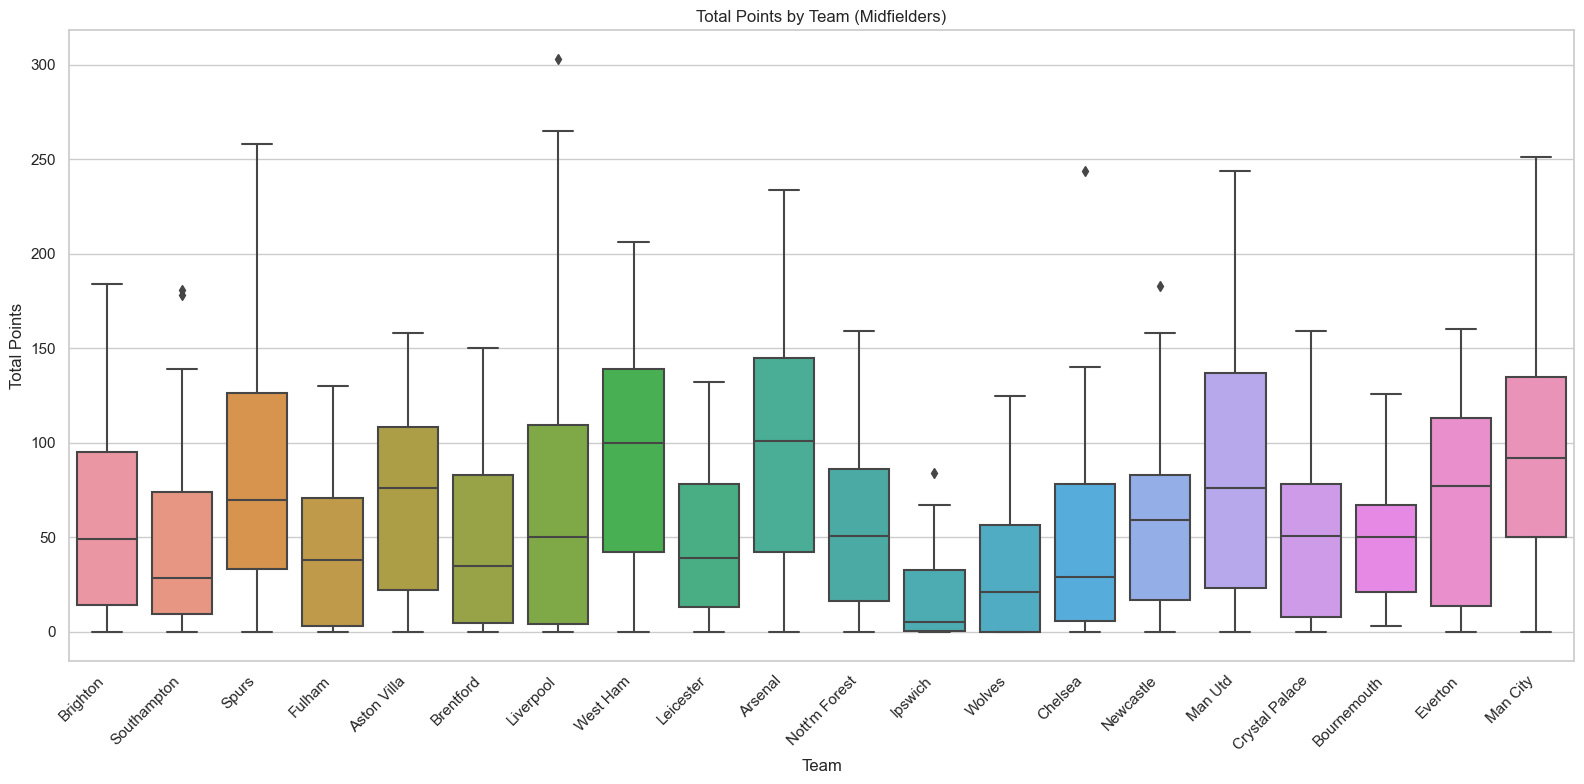

/Users/robertoreis/anaconda3/envs/dev/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


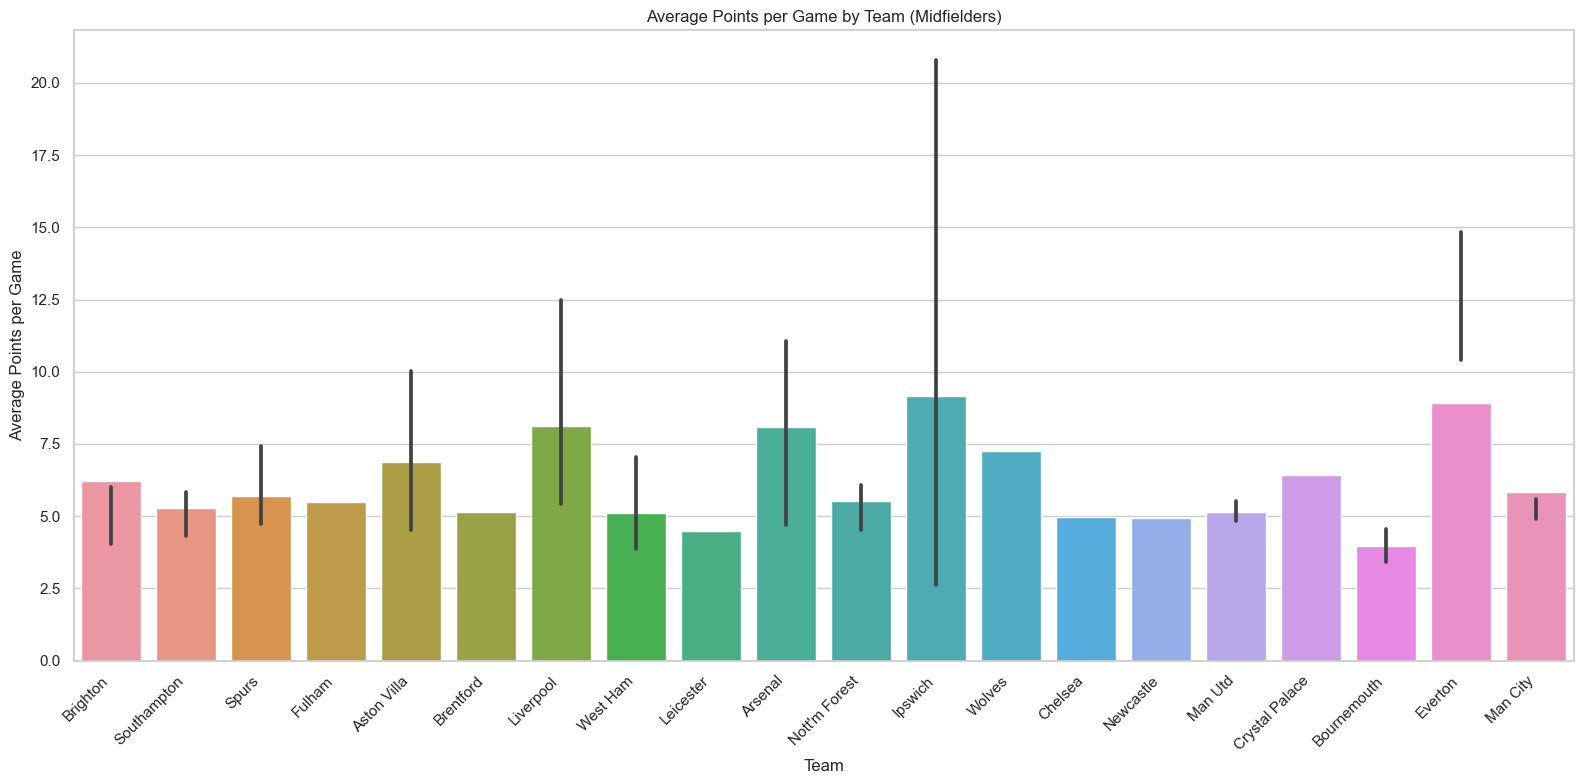


Summary Statistics for Teams (Midfielders):
               total_points                            points_per_game  \
                       mean median        std min  max            mean   
team_name                                                                
Arsenal          100.593220  101.0  66.344742   0  234        8.100085   
Man City          93.163934   92.0  62.590516   0  251        5.829035   
West Ham          91.000000  100.0  61.762088   0  206        5.122505   
Man Utd           84.350877   76.0  68.462318   0  244        5.143306   
Spurs             80.169492   70.0  64.305883   0  258        5.696577   
Liverpool         79.489362   50.0  85.503591   0  303        8.116229   
Everton           68.368421   77.0  49.144806   0  160        8.917074   
Aston Villa       67.388889   76.0  48.108532   0  158        6.867790   
Newcastle         59.786885   59.0  47.400462   0  183        4.936990   
Brighton          59.238095   49.0  50.576583   0  184        6.216

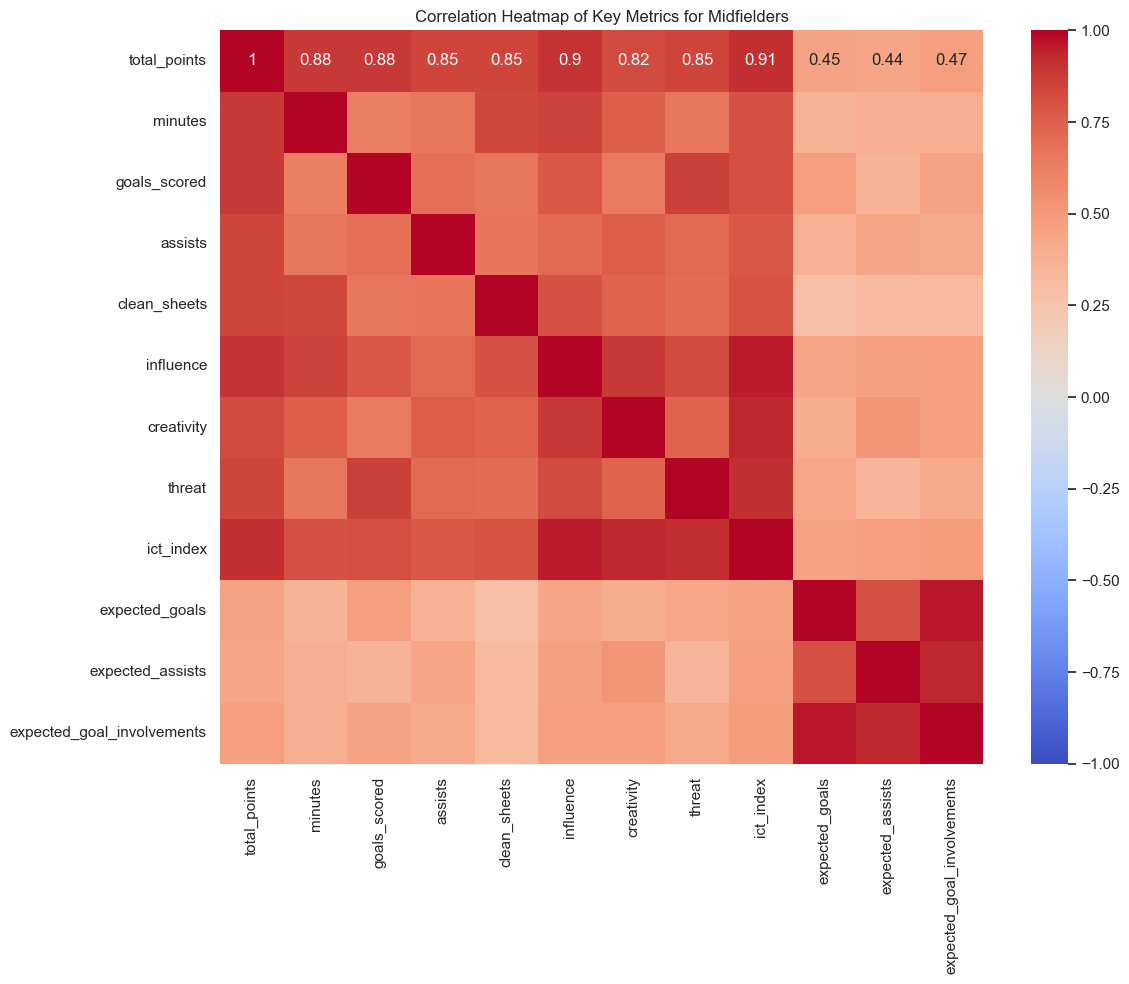

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Base path for cleaned data
base_cleaned_path = '../data/cleaned/'

# Load the cleaned midfielder data
midfielders_df = pd.read_csv(os.path.join(base_cleaned_path, 'midfielder/midfielder_cleaned.csv'))
player_reference_df = pd.read_csv('../data/raw/player_reference.csv')

# Merge with player reference data to add names
midfielders_df = midfielders_df.merge(
    player_reference_df,
    on='element_code',
    how='left',
    suffixes=('_midfielder', '_ref')
)

# Load teams data
teams_df = pd.read_csv('../data/raw/bootstrap_static_teams.csv')

# Load current season's player data to get team information
current_players_df = pd.read_csv('../data/raw/elements.csv')

# Merge with current season's data to get team IDs
midfielders_df = midfielders_df.merge(
    current_players_df[['code', 'team']],
    left_on='element_code',
    right_on='code',
    how='left'
)

# Merge with teams data to get team names
midfielders_df = midfielders_df.merge(
    teams_df[['id', 'name']],
    left_on='team',
    right_on='id',
    how='left'
)

# Rename the 'name' column to 'team_name' for clarity
midfielders_df.rename(columns={'name': 'team_name'}, inplace=True)

# Use the most recent names for players (from the reference data)
midfielders_df['player_name'] = midfielders_df['first_name_ref'] + ' ' + midfielders_df['second_name_ref']

# Calculate points per game
midfielders_df['points_per_game'] = midfielders_df['total_points'] / (midfielders_df['minutes'] / 90)

# Plot total points by team
plt.figure(figsize=(16, 8))
sns.boxplot(x='team_name', y='total_points', data=midfielders_df)
plt.title('Total Points by Team (Midfielders)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Points')
plt.xlabel('Team')
plt.tight_layout()
plt.show()

# Plot average points per game by team
plt.figure(figsize=(16, 8))
sns.barplot(x='team_name', y='points_per_game', data=midfielders_df, estimator=lambda x: x.mean())
plt.title('Average Points per Game by Team (Midfielders)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Points per Game')
plt.xlabel('Team')
plt.tight_layout()
plt.show()

# Display summary statistics
team_stats = midfielders_df.groupby('team_name').agg({
    'total_points': ['mean', 'median', 'std', 'min', 'max'],
    'points_per_game': ['mean', 'median', 'std', 'min', 'max']
}).sort_values(('total_points', 'mean'), ascending=False)

print("\nSummary Statistics for Teams (Midfielders):")
print(team_stats)

# Top 10 midfielders by total points
top_midfielders = midfielders_df.nlargest(10, 'total_points')
print("\nTop 10 Midfielders by Total Points:")
print(top_midfielders[['player_name', 'team_name', 'total_points', 'points_per_game']])

# Correlation heatmap of key metrics
correlation_metrics = ['total_points', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 
                       'influence', 'creativity', 'threat', 'ict_index', 'expected_goals', 
                       'expected_assists', 'expected_goal_involvements']

plt.figure(figsize=(12, 10))
sns.heatmap(midfielders_df[correlation_metrics].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Metrics for Midfielders')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

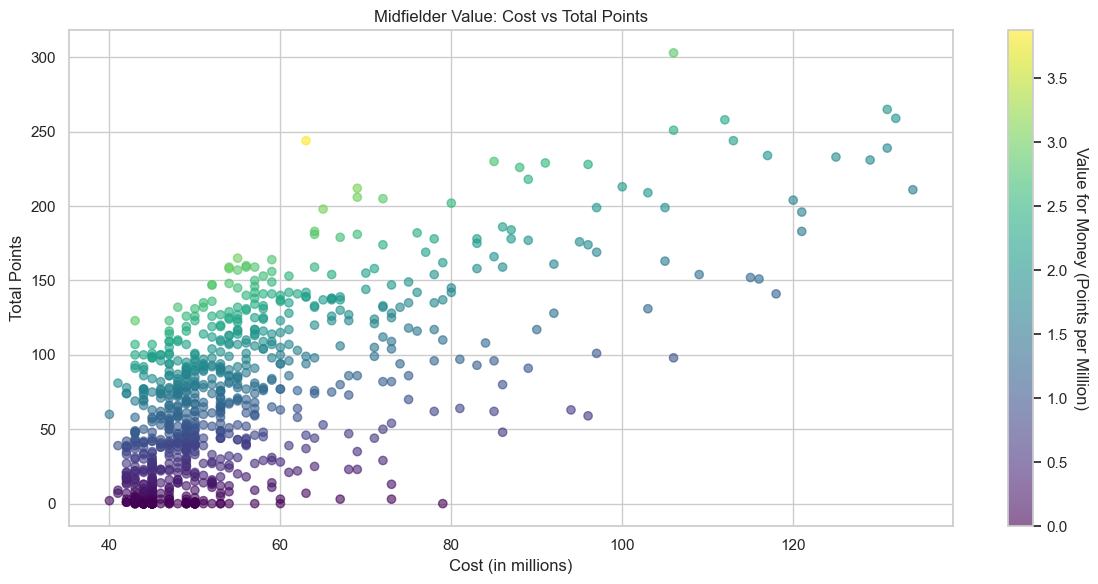

In [32]:
# Value for money: Compare cost vs points
# Value for money: Compare cost vs points for midfielders
plt.figure(figsize=(12, 6))
# Calculate value for money (points per million cost)
midfielders_df['value_for_money'] = midfielders_df['total_points'] / midfielders_df['end_cost']

# Create scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(midfielders_df['end_cost'], midfielders_df['total_points'], 
                      c=midfielders_df['value_for_money'], cmap='viridis', alpha=0.6)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Value for Money (Points per Million)', rotation=270, labelpad=15)

# Customize plot
plt.title('Midfielder Value: Cost vs Total Points')
plt.xlabel('Cost (in millions)')
plt.ylabel('Total Points')

# Add annotations for top 5 value for money players
top_value_players = midfielders_df.nlargest(5, 'value_for_money')
# for idx, player in top_value_players.iterrows():
    # plt.annotate(player['player_name'], 
    #              (player['end_cost'], player['total_points']),
    #              xytext=(5, 5), textcoords='offset points')

plt.tight_layout()



In [33]:
#save the dataframe processed
midfielders_df.to_csv('../data/processed/midfielders_processed.csv', index=False)